In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df18 = pd.read_csv('cleaned_merge18.csv')
df22 = pd.read_csv('cleaned_merge22.csv')

color = "#3C91E6"   # softblue
color2 = "#F5A623"  # orange for comparison bars
sns.set_style("whitegrid")

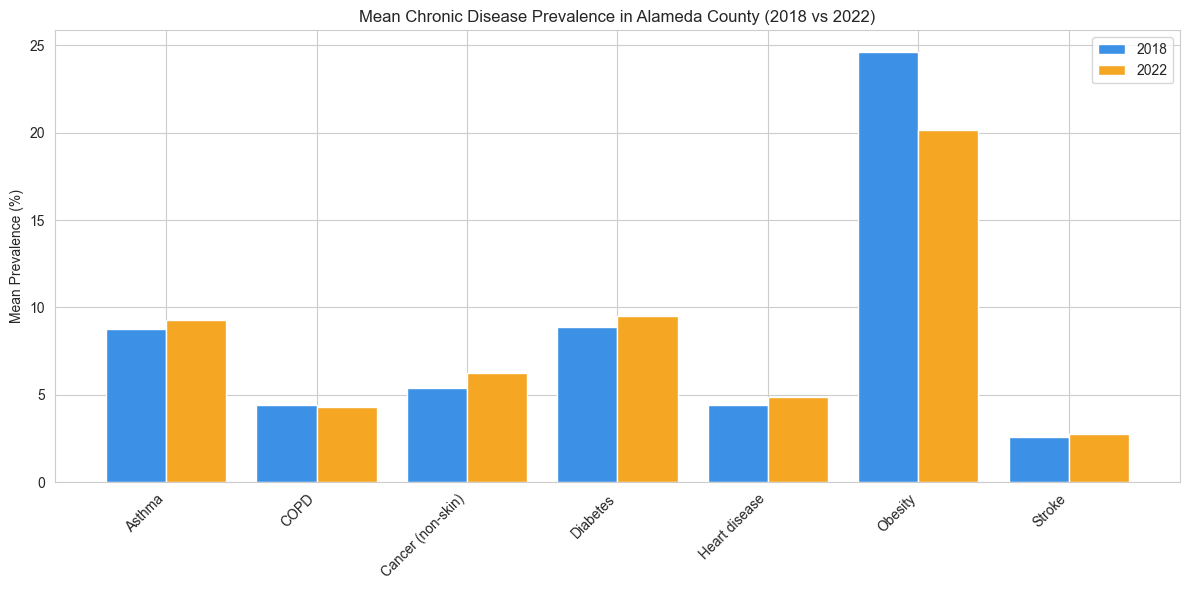

In [20]:
# Calculate mean prevalence
mean18 = df18.groupby('Measure')['Data_Value'].mean().reset_index()
mean22 = df22.groupby('Measure')['Data_Value'].mean().reset_index()

merged = mean18.merge(mean22, on='Measure', suffixes=('_2018', '_2022'))

plt.figure(figsize=(12,6))
x = range(len(merged))

plt.bar(x, merged['Data_Value_2018'], width=0.4, color=color, label='2018')
plt.bar([p + 0.4 for p in x], merged['Data_Value_2022'], width=0.4, color=color2, label='2022')

plt.xticks([p + 0.2 for p in x], merged['Measure'], rotation=45, ha='right')
plt.ylabel('Mean Prevalence (%)')
plt.title('Mean Chronic Disease Prevalence in Alameda County (2018 vs 2022)')
plt.legend()
plt.tight_layout()
plt.show()


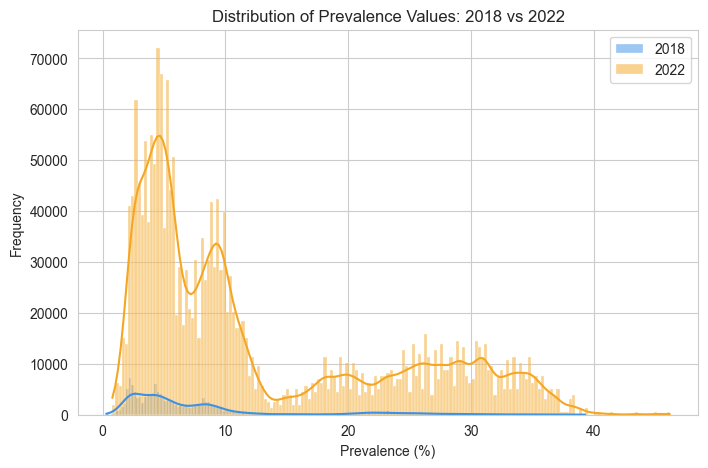

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df18['Data_Value'], color=color, alpha=0.5, kde=True, label='2018')
sns.histplot(df22['Data_Value'], color=color2, alpha=0.5, kde=True, label='2022')

plt.title('Distribution of Prevalence Values: 2018 vs 2022')
plt.xlabel('Prevalence (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


/var/folders/kj/4cjn556j7b7139_q9h80rhbc0000gn/T/ipykernel_8694/3826815880.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Data_Value', data=combined, palette=[color, color2])


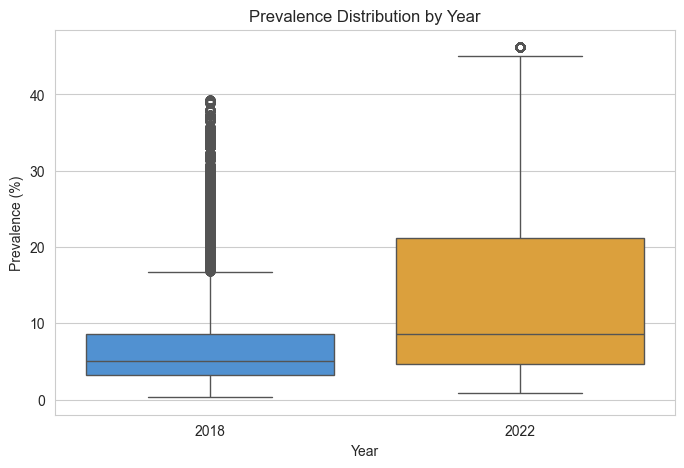

In [22]:
df18['Year'] = 2018
df22['Year'] = 2022

combined = pd.concat([df18, df22])

plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Data_Value', data=combined, palette=[color, color2])
plt.title('Prevalence Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Prevalence (%)')
plt.show()


/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/homebrew/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


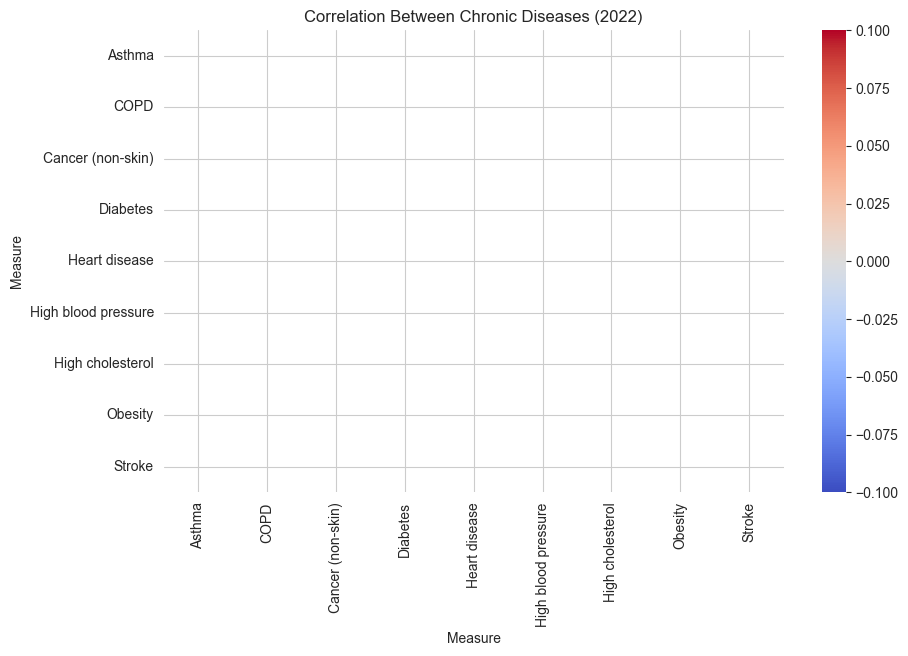

In [23]:
# Pivot so diseases are columns
pivot18 = df18.pivot_table(values='Data_Value', index='County', columns='Measure')
pivot22 = df22.pivot_table(values='Data_Value', index='County', columns='Measure')

plt.figure(figsize=(10,6))
sns.heatmap(pivot22.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Between Chronic Diseases (2022)')
plt.show()


### Correlation Heatmap (Data Limitation)
The CDC PLACES dataset provides social determinant variables at the **county level**, not the disease level. This means all diseases within a year share the same SDOH values (e.g., income, poverty, rent).

Because there is **no variation** across diseases, the correlation between diseases and SDOH fields is **0**, and no meaningful heatmap can be produced.

This limitation prevents disease-level SDOH correlation analysis. Tract-level PLACES data would be required for deeper modeling.


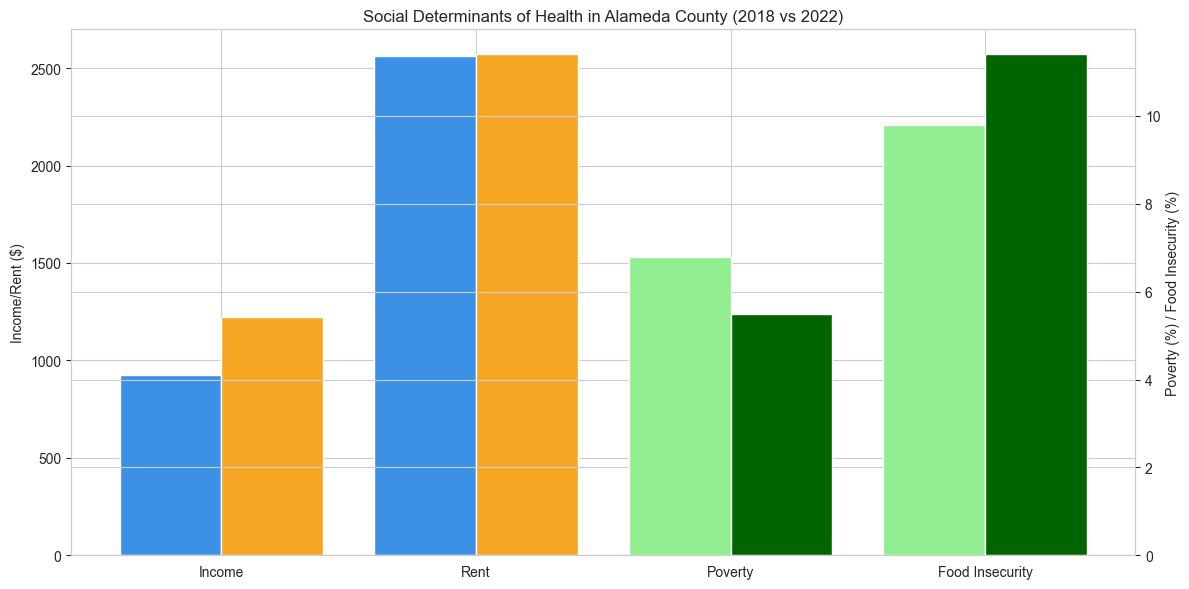

In [27]:
sdoh = {
    "Income": [925.74, 1224.88],
    "Rent": [2563.42, 2569.91],
    "Poverty": [6.8, 5.5],
    "Food Insecurity": [9.8, 11.4]
}

labels = list(sdoh.keys())
values2018 = [v[0] for v in sdoh.values()]
values2022 = [v[1] for v in sdoh.values()]

x = np.arange(len(labels))

fig, ax1 = plt.subplots(figsize=(12,6))

# Large values axis (income + rent)
ax1.bar(x[:2]-0.2, values2018[:2], width=0.4,color=color, label="2018 (Income/Rent)")
ax1.bar(x[:2]+0.2, values2022[:2], width=0.4, color=color2, label="2022 (Income/Rent)")
ax1.set_ylabel("Income/Rent ($)")
ax1.tick_params(axis='y')

# Second axis for poverty + food insecurity
ax2 = ax1.twinx()
ax2.bar(x[2:]-0.2, values2018[2:], width=0.4, color="lightgreen", label="2018 (Poverty/Food)")
ax2.bar(x[2:]+0.2, values2022[2:], width=0.4, color="darkgreen", label="2022 (Poverty/Food)")
ax2.set_ylabel("Poverty (%) / Food Insecurity (%)")

plt.xticks(x, labels)
plt.title("Social Determinants of Health in Alameda County (2018 vs 2022)")
fig.tight_layout()
plt.show()